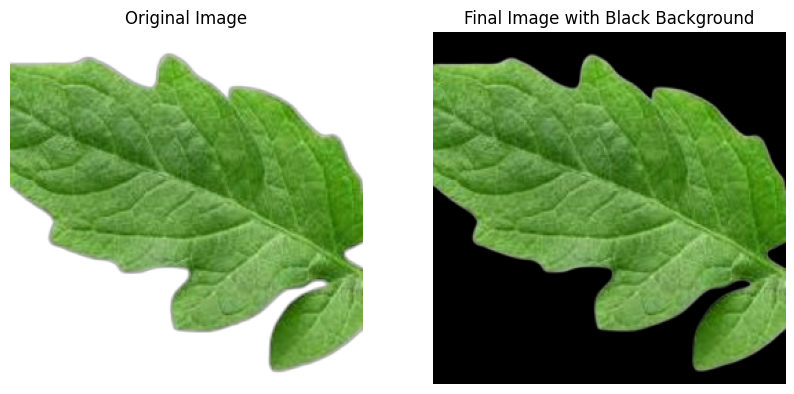

Image saved at /kaggle/working/healthy.png


In [3]:
# Import necessary libraries
#!pip install rembg
from PIL import Image
import numpy as np
import cv2
import rembg
import matplotlib.pyplot as plt

# Load an image using PIL
img_path = "/kaggle/input/healthy/images.jpg"
img = Image.open(img_path)

# Remove the background using rembg
img = rembg.remove(img)

# Convert the PIL image to a NumPy array
img_array = np.array(img)

# Ensure the image array has 4 channels (for RGBA)
if img_array.shape[-1] != 4:
    raise ValueError("The image does not have an alpha channel after background removal.")

# Resize the image to 256x256 pixels using OpenCV
resized_image = cv2.resize(img_array, (256, 256))

# Separate the alpha channel from the resized image
alpha_channel = resized_image[:, :, 3]

# Create a black background image (256x256) with 3 channels (RGB)
black_background = np.zeros((256, 256, 3), dtype=np.uint8)

# Merge the RGB channels from the resized image with the black background
# by using the alpha channel as a mask
for c in range(0, 3):
    black_background[:, :, c] = resized_image[:, :, c] * (alpha_channel / 255) + black_background[:, :, c] * (1 - alpha_channel / 255)

# Convert the final black background image back to PIL
final_image = Image.fromarray(black_background.astype(np.uint8))

# Save the final image to the output directory on Kaggle
output_path = "/kaggle/working/healthy.png"
final_image.save(output_path)

# Display the original and final images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Final Image with Black Background')
plt.imshow(final_image)
plt.axis('off')

plt.show()

print(f"Image saved at {output_path}")
